<a href="https://colab.research.google.com/github/KapilNarayanSingh/Appliance-Energy-Prediction/blob/main/Appliance_energy_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Appliance Energy Prediction**
##**Project Type - Regression**
##**Contribution**- Team
Team Member 1- Kapil Narayan Singh

Team Member 2- Sudhanshu Chouhan

#**Project Summary**
In this project we are going to predict the energy usage of appliance.The data that we have been provided has a data set is of 10 min for about 4.5 months.Data has been made up by monitoring House temprature and Humidity condition by a Zigbee wireless sensor network.Each wireless node transmitted the temprature and Humidity condition for 3.3 minute and the wirelss Data was averaged for 10 minutes.The energy data was logged every 10 minutes with m-bus energy metres.Weather from the nearest airport station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis(rp5.ru) and merged together with experimental data set using Date and time coloumn.In this Data set there are two variables that has been included for testing the regression models and to filter out non- predictive attributes.  

#**Let's Begin!**

##**Know Your Data**

In [1]:
###Downloading all the library required for the project
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection, metrics
import missingno as mno #install running pip install missingno on cmd if using PYPI directly or conda install -c conda-forge missingno -if using anaconda)\
import plotly.offline as py #Package for data visulization
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from  sklearn.linear_model import Ridge
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from  sklearn.preprocessing  import PolynomialFeatures
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
raw_data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data science/module 1/data_application_energy.csv")

## Data first view

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
raw_data= raw_data.rename(columns={'Appliances':'consumption','T1':'Temprature in kitchen area' , 'RH_1':'Humidity in kitchen area', 'T2':'Temprature in living room area', 'RH_2':'Humidity in living room area', 'T3':'Temprature in laundary room area', 'RH_3':'Humidity in laundary room', 'T4':'Temprature in office room',
       'RH_4':'Humidity in office room', 'T5':'Temprature in bathroom', 'RH_5':'Humidity in bathroom', 'T6':'Temprature outside the building', 'RH_6':'Humdity outside the building', 'T7':'Temprature in ironing room', 'RH_7':'Humdity in ironing room ', 'T8':'Temprature in teenager room', 'RH_8':'Humidity in teenager room', 'T9':'Temprature in parents room',
       'RH_9':'Humidity in parents room', 'T_out':'Temprature from weather station','RH_out':'Humidity from station',
       'rv1':'random variable1', 'rv2':'random variable2'})

In [6]:
raw_data.head()

,date,consumption,lights,Temprature in kitchen area,Humidity in kitchen area,Temprature in living room area,Humidity in living room area,Temprature in laundary room area,Humidity in laundary room,Temprature in office room,Humidity in office room,Temprature in bathroom,Humidity in bathroom,Temprature outside the building,Humdity outside the building,Temprature in ironing room,Humdity in ironing room,Temprature in teenager room,Humidity in teenager room,Temprature in parents room,Humidity in parents room,Temprature from weather station,Press_mm_hg,Humidity from station,Windspeed,Visibility,Tdewpoint,random variable1,random variable2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [7]:
raw_data.tail()

,date,consumption,lights,Temprature in kitchen area,Humidity in kitchen area,Temprature in living room area,Humidity in living room area,Temprature in laundary room area,Humidity in laundary room,Temprature in office room,Humidity in office room,Temprature in bathroom,Humidity in bathroom,Temprature outside the building,Humdity outside the building,Temprature in ironing room,Humdity in ironing room,Temprature in teenager room,Humidity in teenager room,Temprature in parents room,Humidity in parents room,Temprature from weather station,Press_mm_hg,Humidity from station,Windspeed,Visibility,Tdewpoint,random variable1,random variable2
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,45.590000,23.20,52.400000,24.796667,1.0,24.500000,44.500000,24.7000,50.07400,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,45.590000,23.23,52.326667,24.196667,1.0,24.557143,44.414286,24.7000,49.79000,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,45.730000,23.23,52.266667,23.626667,1.0,24.540000,44.400000,24.7000,49.66000,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,45.790000,23.20,52.200000,22.433333,1.0,24.500000,44.295714,24.6625,49.51875,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
19734,2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,45.963333,23.20,52.200000,21.026667,1.0,24.500000,44.054000,24.7360,49.73600,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


## Dataset Rows and Column

In [8]:
raw_data.shape

(19735, 29)

## Dataset Information

In [9]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   date                              19735 non-null  object 
 1   consumption                       19735 non-null  int64  
 2   lights                            19735 non-null  int64  
 3   Temprature in kitchen area        19735 non-null  float64
 4   Humidity in kitchen area          19735 non-null  float64
 5   Temprature in living room area    19735 non-null  float64
 6   Humidity in living room area      19735 non-null  float64
 7   Temprature in laundary room area  19735 non-null  float64
 8   Humidity in laundary room         19735 non-null  float64
 9   Temprature in office room         19735 non-null  float64
 10  Humidity in office room           19735 non-null  float64
 11  Temprature in bathroom            19735 non-null  float64
 12  Humi

## Duplicate Value

In [10]:
#Duplicate value
raw_data.duplicated().sum()

0

## Missing Values

In [11]:
raw_data.isna().sum()

date                                0
consumption                         0
lights                              0
Temprature in kitchen area          0
Humidity in kitchen area            0
Temprature in living room area      0
Humidity in living room area        0
Temprature in laundary room area    0
Humidity in laundary room           0
Temprature in office room           0
Humidity in office room             0
Temprature in bathroom              0
Humidity in bathroom                0
Temprature outside the building     0
Humdity outside the building        0
Temprature in ironing room          0
Humdity in ironing room             0
Temprature in teenager room         0
Humidity in teenager room           0
Temprature in parents room          0
Humidity in parents room            0
Temprature from weather station     0
Press_mm_hg                         0
Humidity from station               0
Windspeed                           0
Visibility                          0
Tdewpoint   

## Data finding

##There are no missing values in the data as wells no duplicate values.From the data we get to know that there are 29 coloumn of which 26 are of float type,2 are of integer type and only one is of object type. 

#**Describing Variables**

In [12]:
raw_data.describe()

,consumption,lights,Temprature in kitchen area,Humidity in kitchen area,Temprature in living room area,Humidity in living room area,Temprature in laundary room area,Humidity in laundary room,Temprature in office room,Humidity in office room,Temprature in bathroom,Humidity in bathroom,Temprature outside the building,Humdity outside the building,Temprature in ironing room,Humdity in ironing room,Temprature in teenager room,Humidity in teenager room,Temprature in parents room,Humidity in parents room,Temprature from weather station,Press_mm_hg,Humidity from station,Windspeed,Visibility,Tdewpoint,random variable1,random variable2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [13]:
pd.value_counts('raw_data')

raw_data    8
dtype: int64

##**Checking Unique Values for each variables**

In [14]:
raw_data.nunique()

date                                19735
consumption                            92
lights                                  8
Temprature in kitchen area            722
Humidity in kitchen area             2547
Temprature in living room area       1650
Humidity in living room area         3376
Temprature in laundary room area     1426
Humidity in laundary room            2618
Temprature in office room            1390
Humidity in office room              2987
Temprature in bathroom               2263
Humidity in bathroom                 7571
Temprature outside the building      4446
Humdity outside the building         9709
Temprature in ironing room           1955
Humdity in ironing room              5891
Temprature in teenager room          2228
Humidity in teenager room            6649
Temprature in parents room            924
Humidity in parents room             3388
Temprature from weather station      1730
Press_mm_hg                          2189
Humidity from station             

In [15]:
raw_data['consumption'].describe()

count    19735.000000
mean        97.694958
std        102.524891
min         10.000000
25%         50.000000
50%         60.000000
75%        100.000000
max       1080.000000
Name: consumption, dtype: float64

Data for the dependable variable "Appliances" is not normally distributed since it is positively skewed.

About 75% of the values fall between 10 W/hr and 100 W/hr.

The data has a standard deviation of 102.54, which indicates that there are lots of outliers.

# 3. **Data Wrangling**

In [17]:
raw_data['date'] = pd.to_datetime(raw_data['date'])
raw_data['month'] = raw_data.date.dt.month
raw_data['weekday'] = raw_data.date.dt.weekday
raw_data['hour'] = raw_data.date.dt.hour

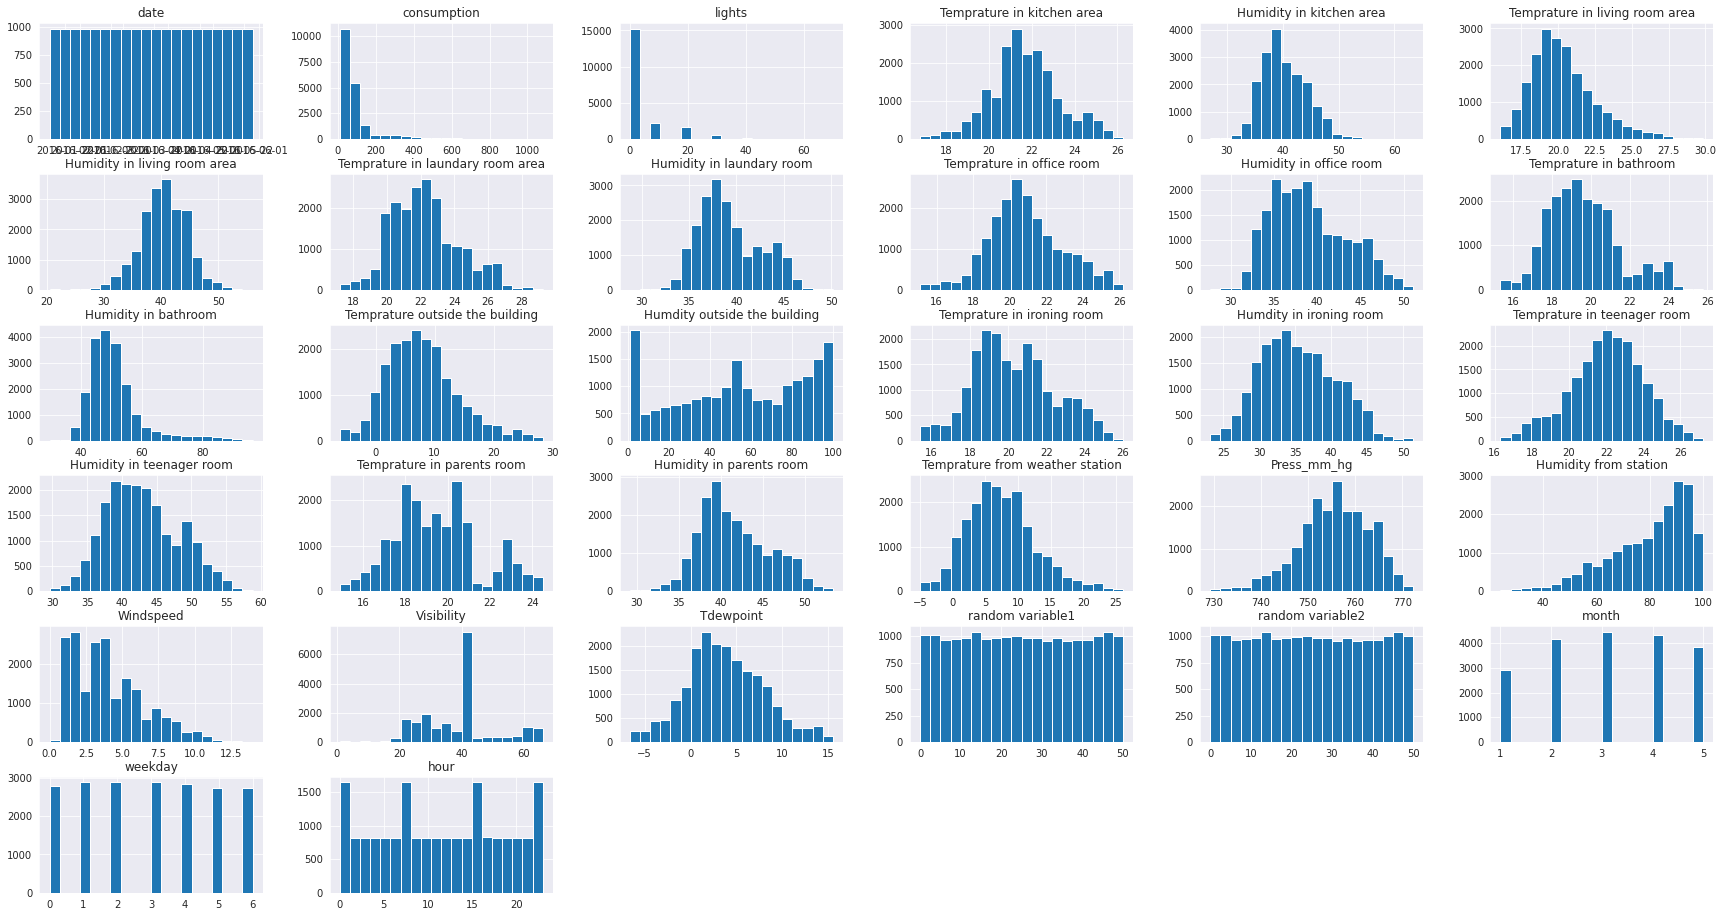

In [18]:
# Histogram of all the features to understand the distribution
raw_data.hist(bins = 20 , figsize= (30,16)) ;

From this hist plot we come to a conclusion that most of the graphs are providing some insight but rv1, rv2 and lights are not coming out as relevant data therefore we can drop them off.

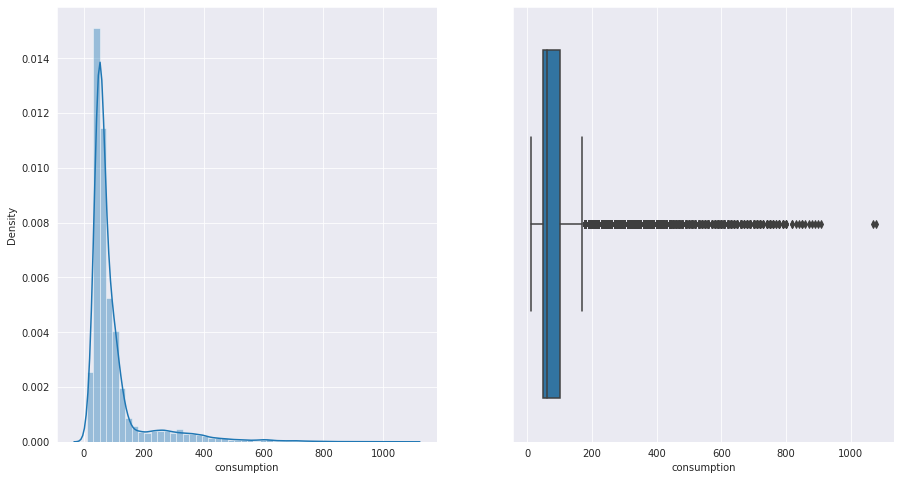

In [19]:
fig,ax=plt.subplots(1,2, figsize=(15,8))
sns.distplot(raw_data.consumption,ax=ax[0])
sns.boxplot(raw_data.consumption, ax=ax[1])

In [20]:
#checking skewness
raw_data['consumption'].skew()

3.3863672147430632

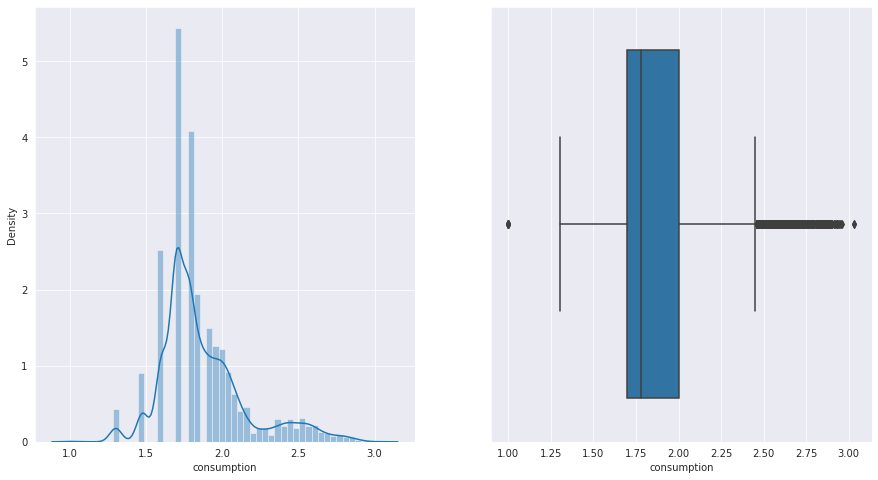

In [21]:
fig,ax=plt.subplots(1,2,figsize = (15,8))
sns.distplot(np.log10(raw_data.consumption),ax=ax[0])
sns.boxplot(np.log10(raw_data.consumption),ax=ax[1])

In [22]:
np.log10(raw_data['consumption']).skew()

1.1658168888065428

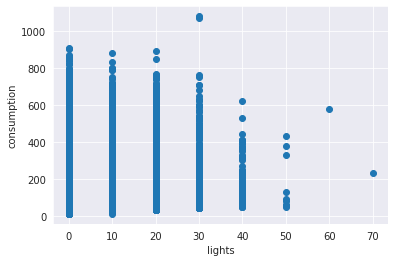

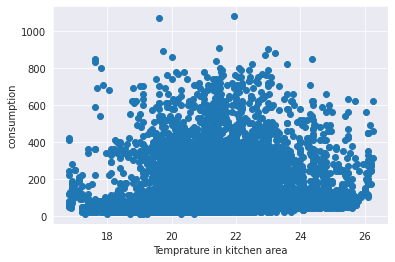

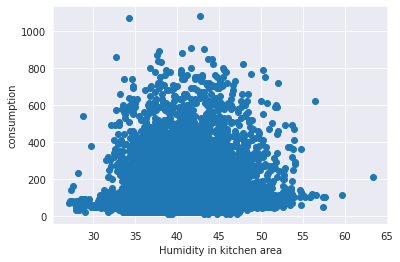

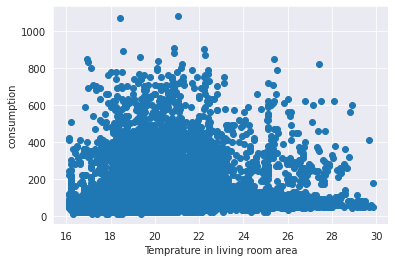

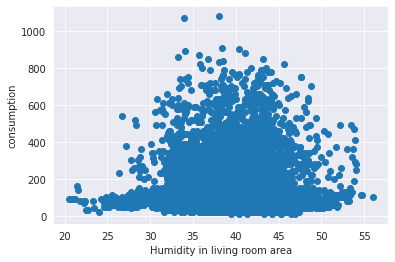

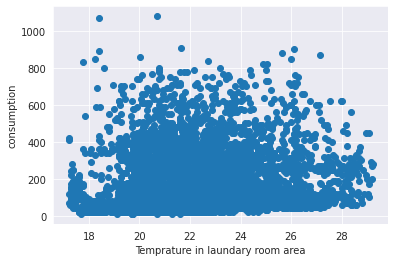

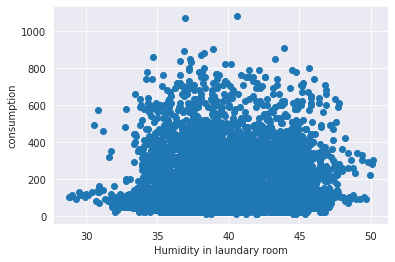

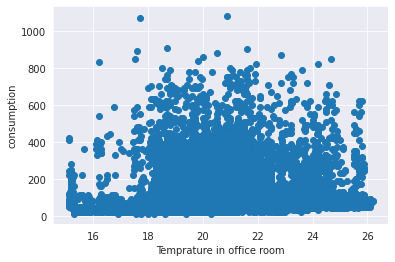

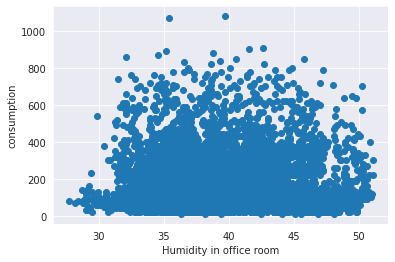

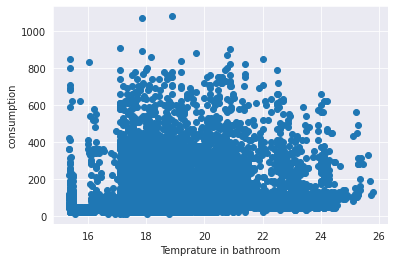

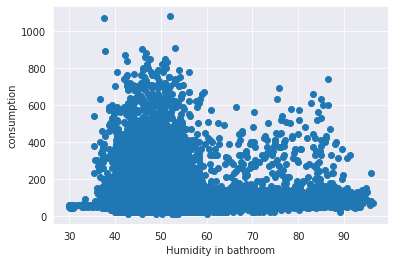

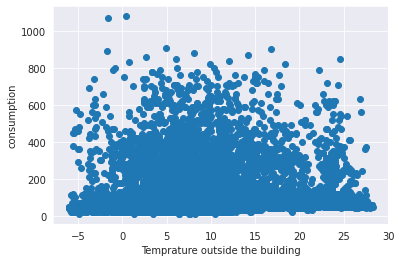

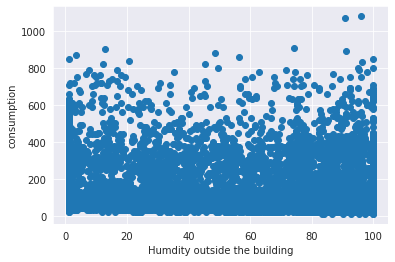

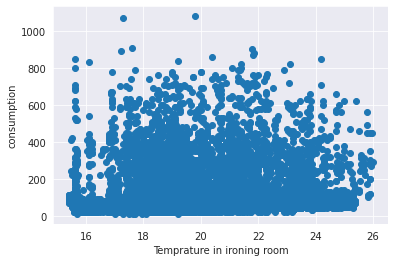

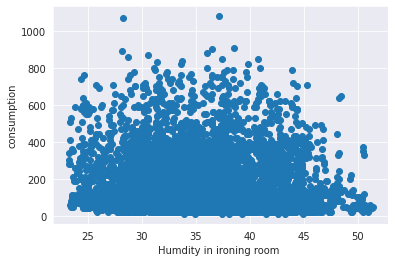

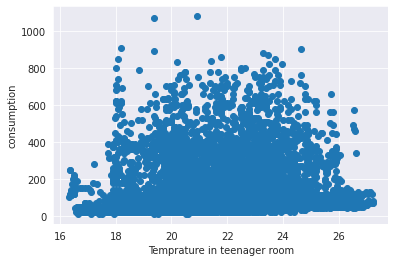

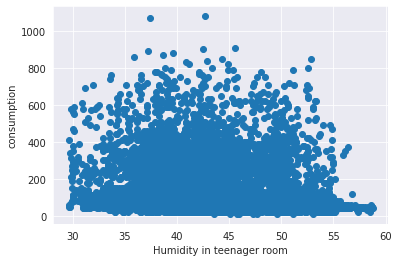

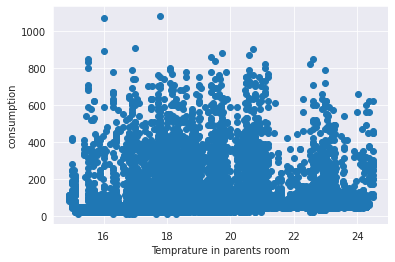

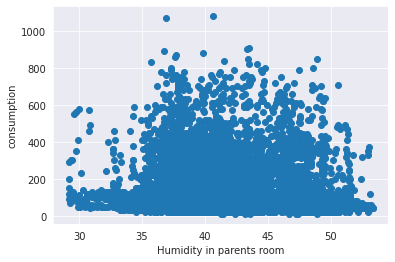

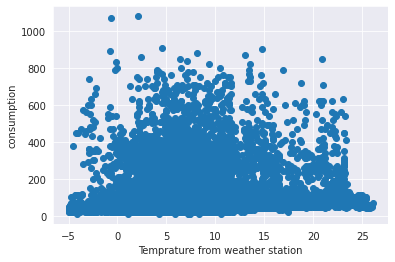

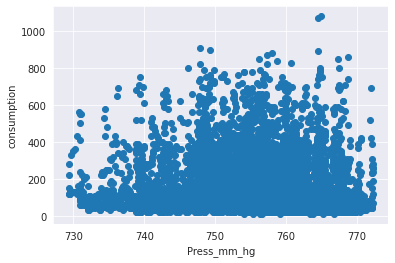

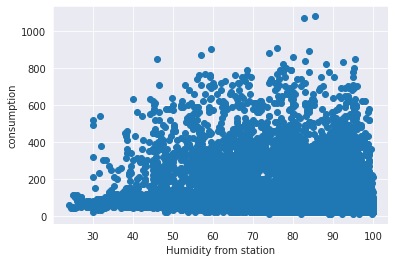

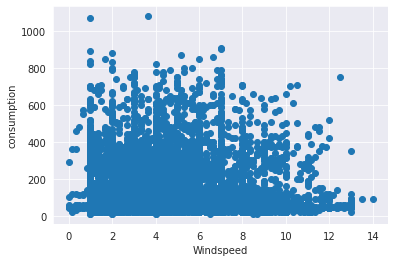

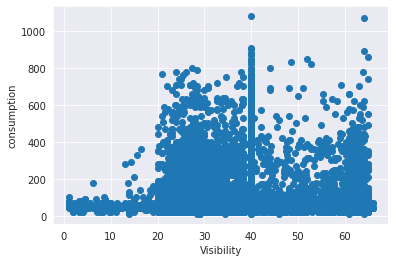

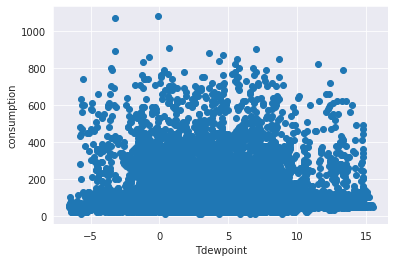

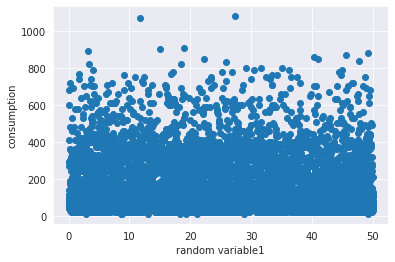

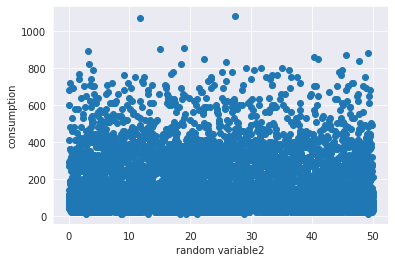

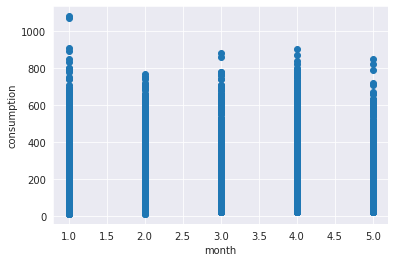

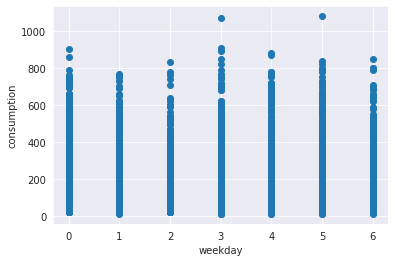

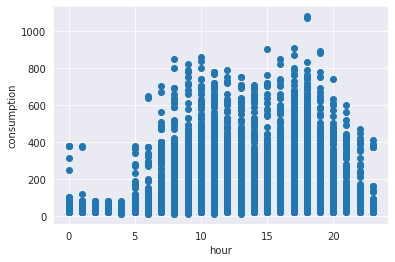

In [23]:
y= raw_data['consumption']
col=['consumption', 'lights', 'Temprature in kitchen area',
       'Humidity in kitchen area', 'Temprature in living room area',
       'Humidity in living room area', 'Temprature in laundary room area',
       'Humidity in laundary room', 'Temprature in office room',
       'Humidity in office room', 'Temprature in bathroom',
       'Humidity in bathroom', 'Temprature outside the building',
       'Humdity outside the building', 'Temprature in ironing room',
       'Humdity in ironing room ', 'Temprature in teenager room',
       'Humidity in teenager room', 'Temprature in parents room',
       'Humidity in parents room', 'Temprature from weather station',
       'Press_mm_hg', 'Humidity from station', 'Windspeed', 'Visibility',
       'Tdewpoint', 'random variable1', 'random variable2', 'month', 'weekday',
       'hour']
for i in col[1:]:
    plt.figure
    plt.scatter(raw_data[i],y)
    plt.xlabel(i)
    plt.ylabel('consumption')
    
    plt.show() 

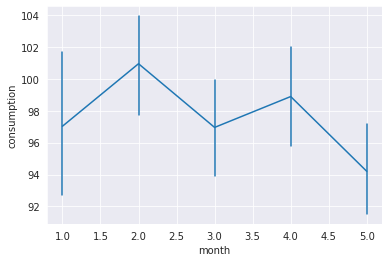

In [24]:
info = raw_data.iloc[:,]
sns.lineplot(x="month",y="consumption",data=info,err_style="bars",palette="Set2")
plt.show()

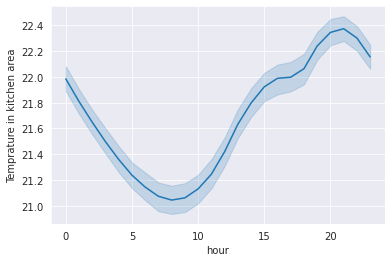

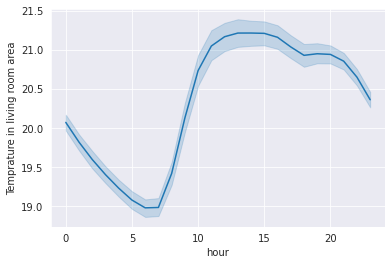

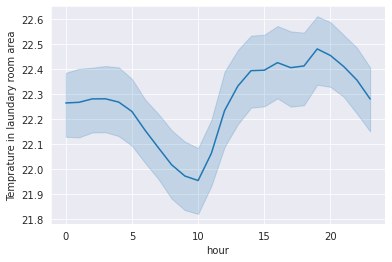

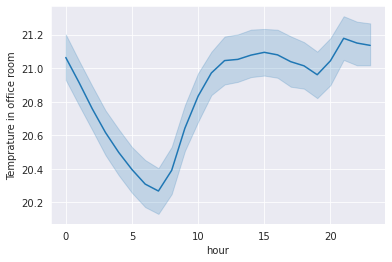

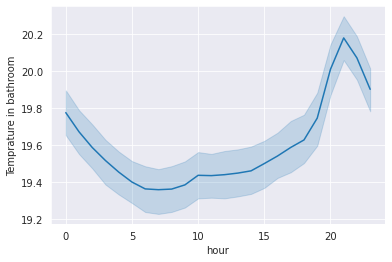

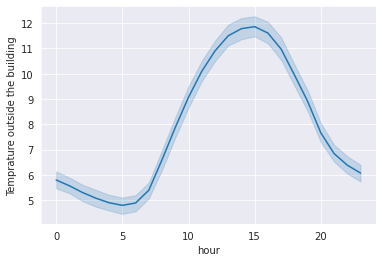

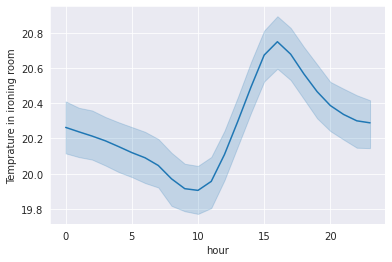

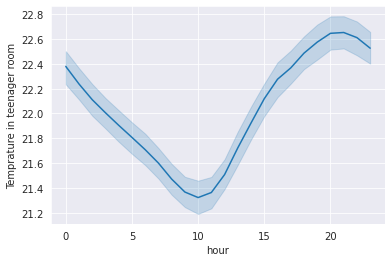

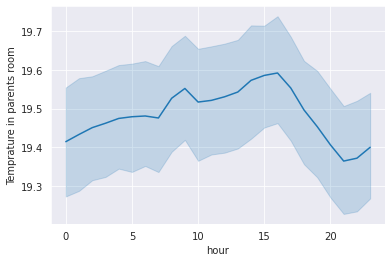

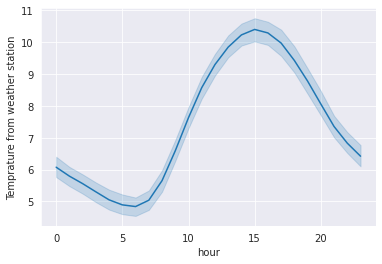

In [25]:
info = raw_data.iloc[:,]
col=["Temprature in kitchen area","Temprature in living room area","Temprature in laundary room area","Temprature in office room","Temprature in bathroom","Temprature outside the building","Temprature in ironing room","Temprature in teenager room","Temprature in parents room","Temprature from weather station"]
for i in col:
   sns.lineplot(x="hour",y=raw_data[i],data=info)
   plt.show()

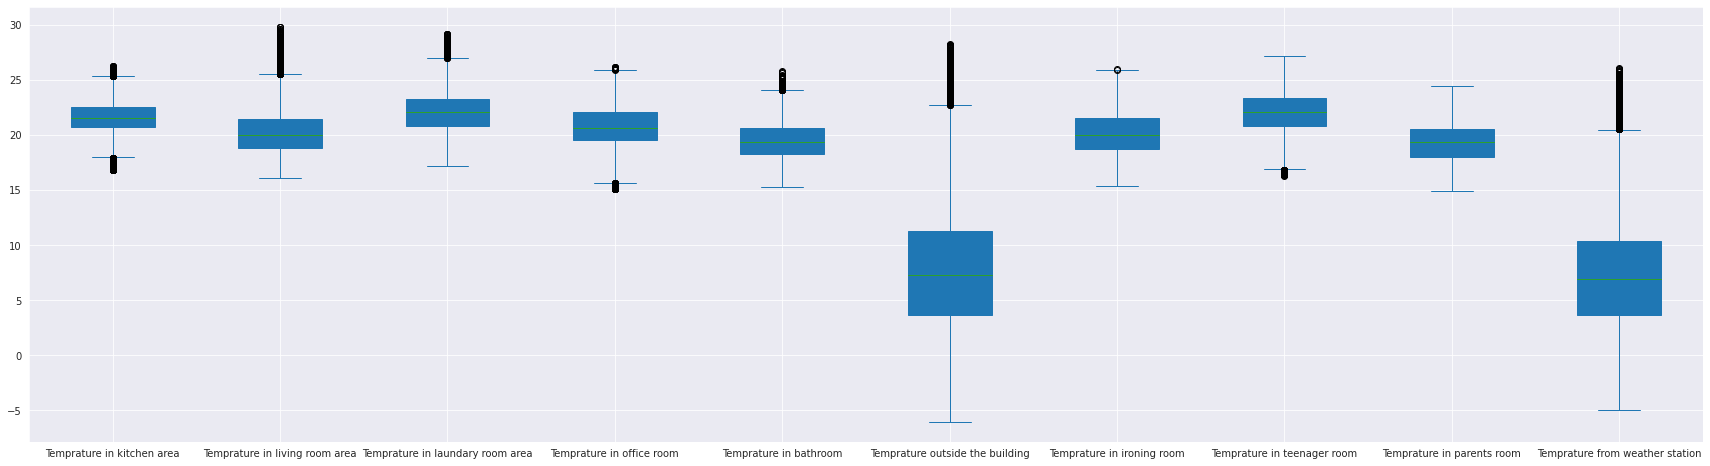

In [26]:
df1=pd.DataFrame(data=raw_data,columns=["Temprature in kitchen area","Temprature in living room area","Temprature in laundary room area","Temprature in office room","Temprature in bathroom","Temprature outside the building","Temprature in ironing room","Temprature in teenager room","Temprature in parents room","Temprature from weather station"])
df1.plot(kind="box",patch_artist=True,figsize=(30,8))

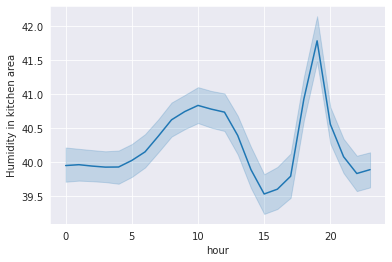

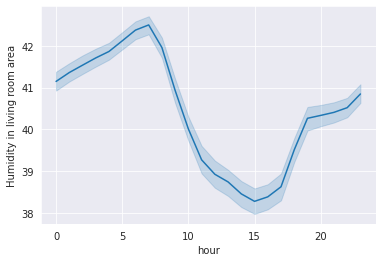

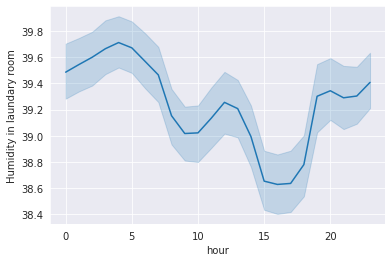

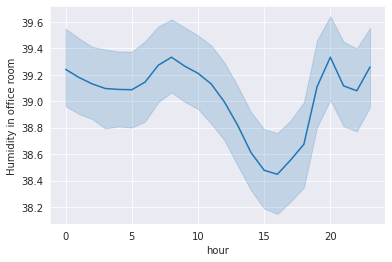

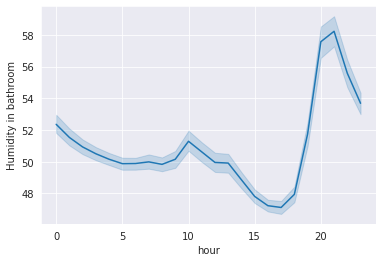

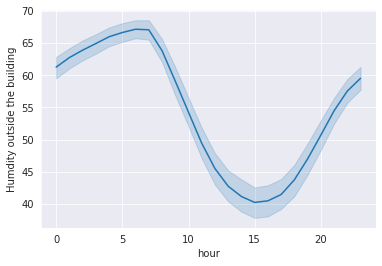

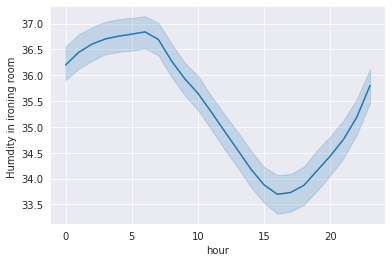

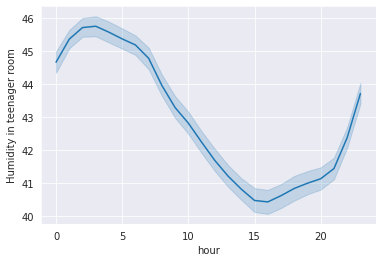

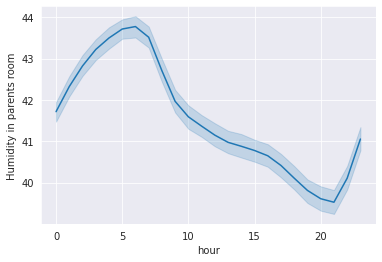

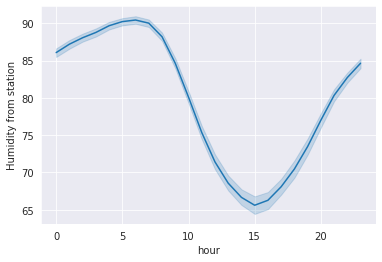

In [27]:
info = raw_data.iloc[:,]
col=['Humidity in kitchen area','Humidity in living room area', 'Humidity in laundary room', 'Humidity in office room','Humidity in bathroom',
       'Humdity outside the building','Humdity in ironing room ', 'Humidity in teenager room','Humidity in parents room','Humidity from station']
for i in col:
   sns.lineplot(x="hour",y=raw_data[i],data=info)
   plt.show()

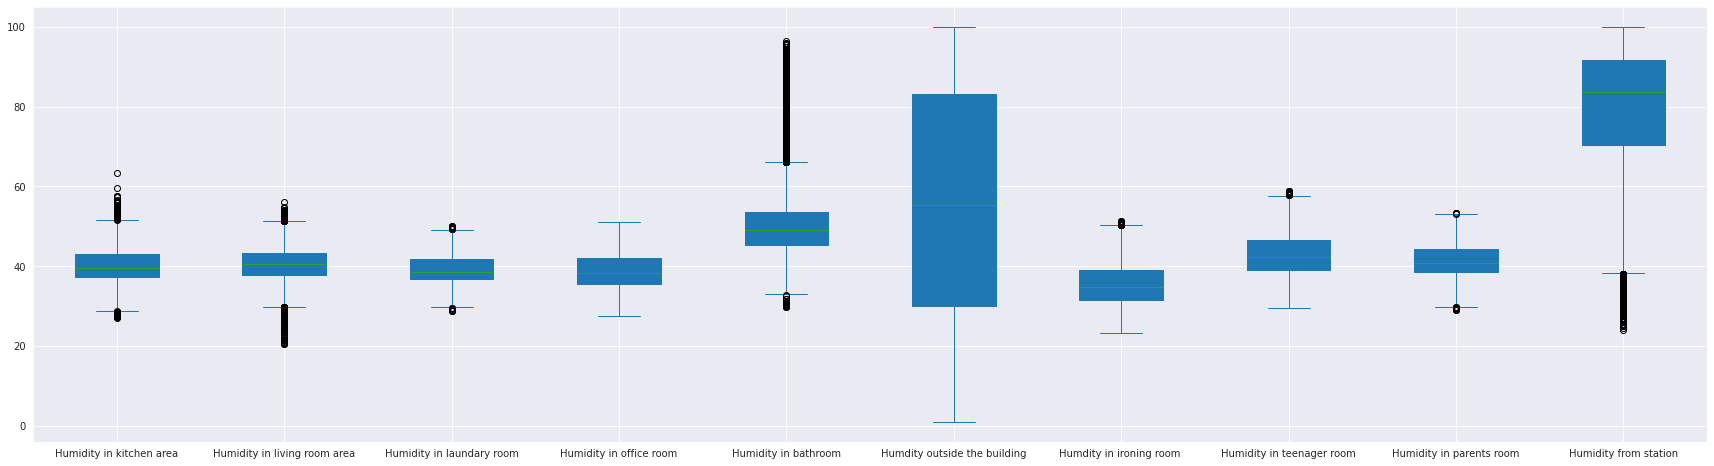

In [28]:
df2=pd.DataFrame(data=raw_data,columns=['Humidity in kitchen area','Humidity in living room area','Humidity in laundary room','Humidity in office room','Humidity in bathroom','Humdity outside the building', 
       'Humdity in ironing room ', 'Humidity in teenager room','Humidity in parents room','Humidity from station'])
df2.plot(kind="box",patch_artist=True,figsize=(30,8))

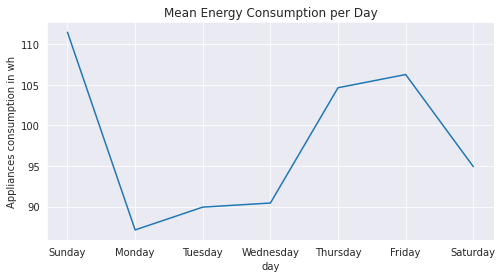

In [31]:
# Mean Energy Consumption on different days of the week

raw_data.groupby('weekday')['consumption'].mean().plot(figsize=(8,4))
plt.xlabel('day')
plt.ylabel('Appliances consumption in wh')
ticks = list(range(0, 7, 1))
plt.title('Mean Energy Consumption per Day')
labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.xticks(ticks, labels=labels)
plt.show()

Text(0, 0.5, 'Appliances (Wh)')

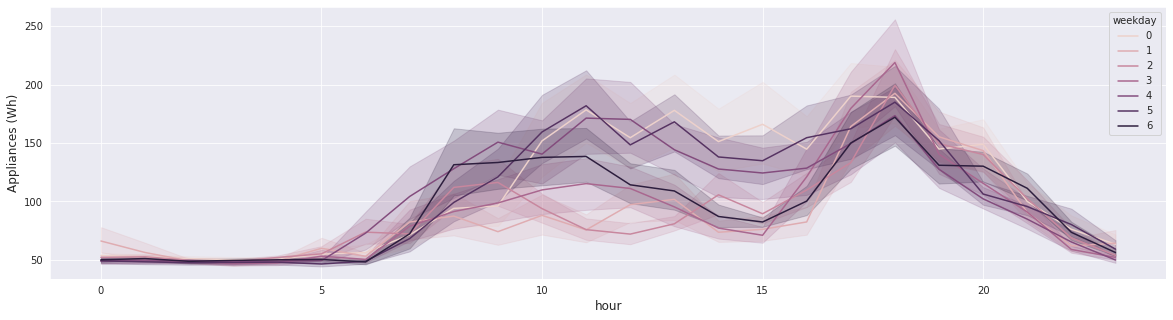

In [32]:
plt.figure(figsize=(20,5))
sns.lineplot(x="hour",y="consumption",hue="weekday",data=raw_data)
plt.xlabel("hour",size=12)
plt.ylabel("Appliances (Wh)",size=12)

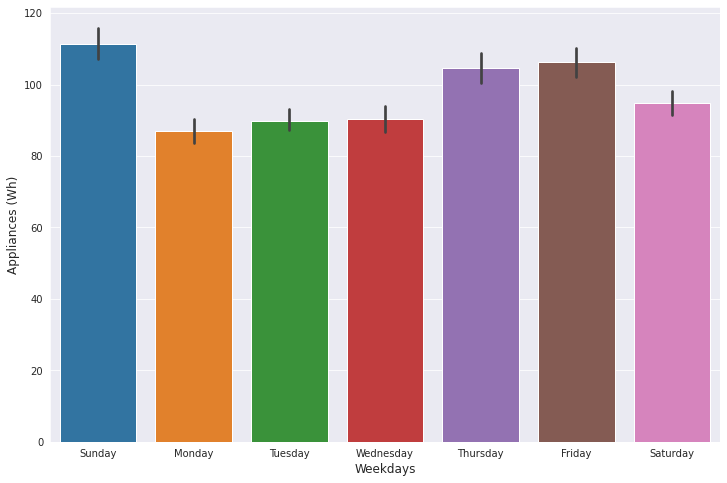

In [33]:
plt.figure(figsize=(12,8))
sns.barplot(x="weekday",y="consumption",data=raw_data)
plt.xlabel("Weekdays",size=12)
plt.ylabel("Appliances (Wh)",size=12)
labels ='Sunday Monday Tuesday Wednesday Thursday Friday Saturday'.split()
plt.xticks(ticks, labels);

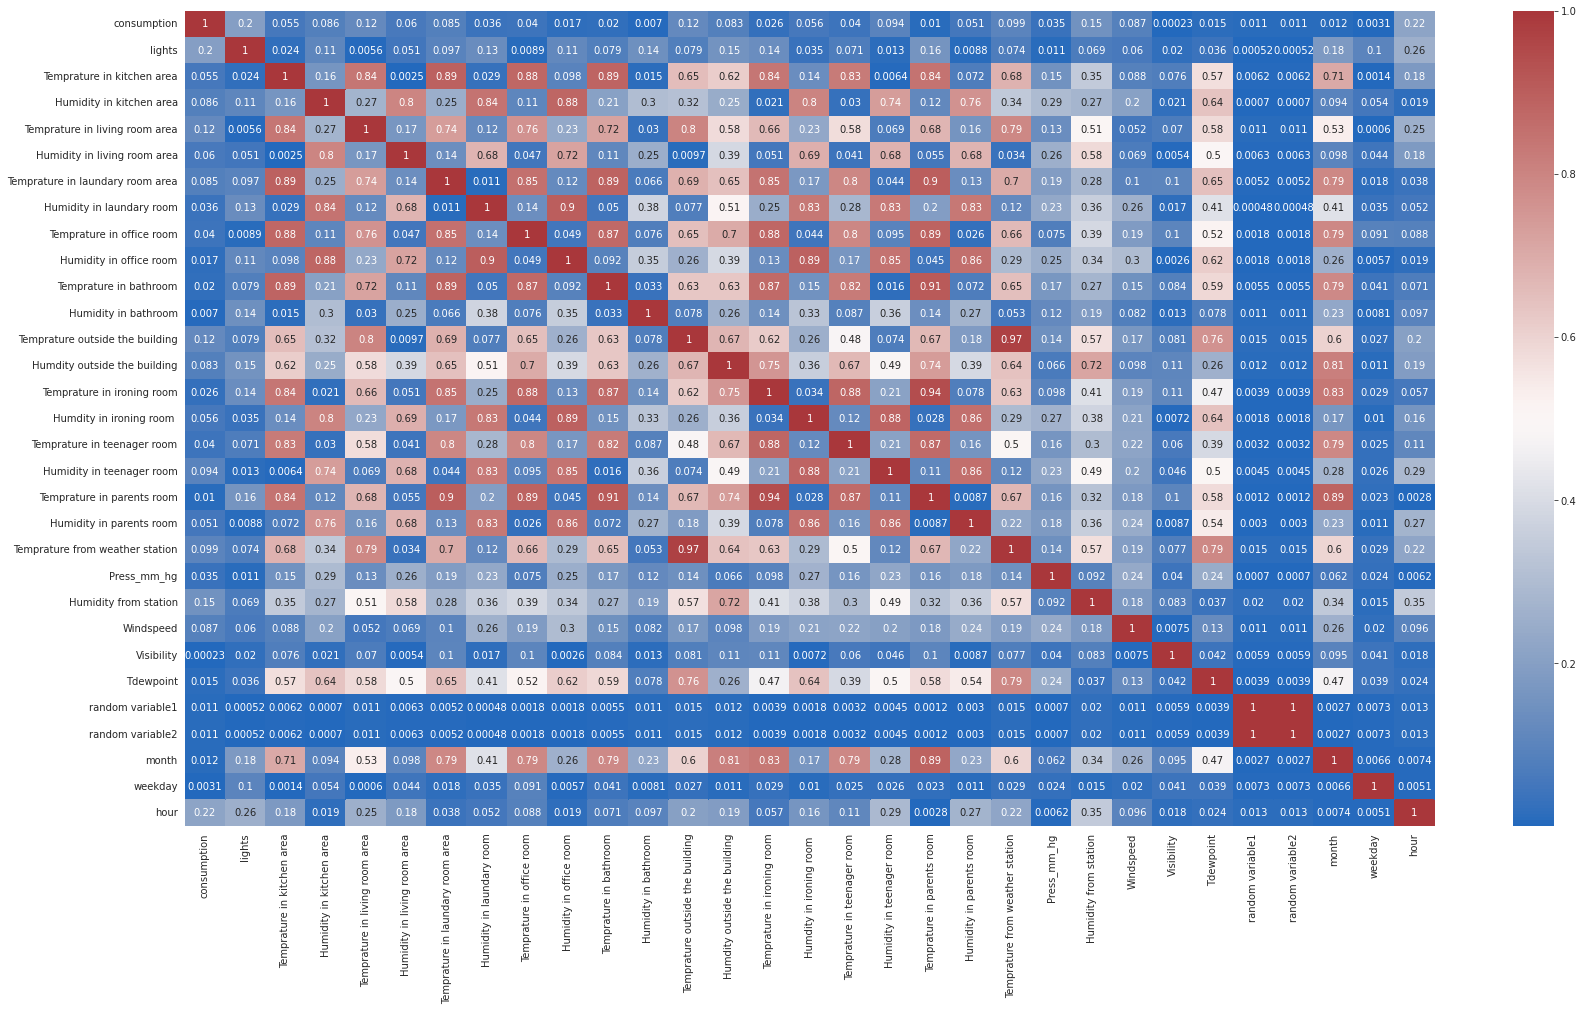

In [34]:
plt.figure(figsize=(28,15))
correlation=raw_data.corr()
sns.heatmap(abs(correlation),annot=True,cmap="vlag")